In [1]:
### Import all the libraries

# data processing
import pandas as pd 
import numpy as np

# data visualization
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
import pylab

### for algos
import os
import warnings
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from scipy.special import boxcox1p
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import RobustScaler, PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest, RFECV, SelectFromModel
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_extraction import FeatureHasher
from sklearn.decomposition import PCA, KernelPCA
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression, OrthogonalMatchingPursuit, Lasso, LassoLarsIC, ElasticNet, ElasticNetCV
from sklearn.linear_model import SGDRegressor, PassiveAggressiveRegressor, HuberRegressor, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor
#import xgboost as xgb
#from xgboost import XGBRegressor, plot_importance
#import lightgbm as lgb

from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
### read the date set by using pandas (read_csv())

### read the data Train set 

train_doc = pd.read_csv(r"C:\Users\Acer\housing-project\train.csv")
train_doc.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,nan,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.000,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.000,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.000,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,nan,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [3]:
train_doc.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,nan,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.000,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.000,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.000,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,nan,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
### read the date set by using pandas (read_csv())

### read the data Test set 

test_doc = pd.read_csv(r"C:\Users\Acer\housing-project\test.csv")
test_doc

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.000,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,nan,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,nan,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,nan,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,nan,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,nan,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.000,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,nan,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.000,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,nan,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.000,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,nan,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.000,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,nan,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,nan,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,nan,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.000,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,nan,NaN,NaN,0,10,2006,WD,Normal


In [5]:
## check the shape of the data set :=

print("Row & Columns in the train_doc:- " , train_doc.shape )
print()
print("Row & Columns in the test_doc:- " , test_doc.shape )
## as we check that the shape of the data set is 1168 rows and 81 column in the 

Row & Columns in the train_doc:-  (1168, 81)

Row & Columns in the test_doc:-  (292, 80)


In [6]:
## check the data type of the data columns 

train_doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [7]:
### check the unique value of the data set 
(train_doc.apply(lambda x: len(x.unique())))

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       107
LotArea           892
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         581
Length: 81, dtype: int64

In [8]:
## Let’s take a more detailed look at what data is actually missing in the data set and the precentage of it  

total = train_doc.isnull().sum().sort_values(ascending=False)

percent_1 = train_doc.isnull().sum()/train_doc.isnull().count()*100

percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

missing_data

,Total,%
PoolQC,1161,99.400
MiscFeature,1124,96.200
Alley,1091,93.400
Fence,931,79.700
FireplaceQu,551,47.200
...,...,...
BsmtHalfBath,0,0.000
FullBath,0,0.000
HalfBath,0,0.000
BedroomAbvGr,0,0.000


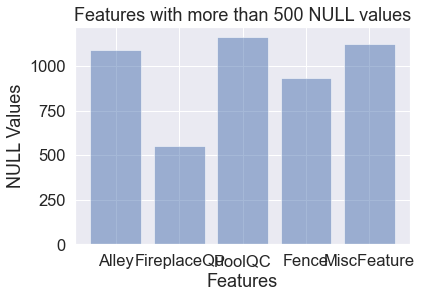

In [9]:
#Plot features with more than 500 NULL values

features = []
nullValues = []
for i in train_doc:
    if (train_doc.isna().sum()[i])>500 and i!='SalePrice':
        features.append(i)
        nullValues.append(train_doc.isna().sum()[i])
y_pos = np.arange(len(features)) 
plt.bar(y_pos, nullValues, align='center', alpha=0.5)
plt.xticks(y_pos, features)
plt.ylabel('NULL Values')
plt.xlabel('Features')
plt.title('Features with more than 500 NULL values')
plt.show()

In [10]:
## lets find out the columns name hows missing value is grater then 50%
missing_data[missing_data["%"]>=45]

,Total,%
PoolQC,1161,99.400
MiscFeature,1124,96.200
Alley,1091,93.400
Fence,931,79.700
FireplaceQu,551,47.200


In [11]:
## drop all the rows those have missing value more then 45%
missing_data.drop(['PoolQC', 'MiscFeature',"Alley","Fence"],axis=0,inplace=True)
missing_data.drop(["FireplaceQu"],axis=0,inplace=True)

In [12]:
## drop all the columns those have missing value more then 50%

#train_doc.drop(columns=['PoolQC', 'MiscFeature',"Alley","Fence"],inplace=True)
#train_doc.shape

#Dealing with NULL values
train_doc = train_doc.dropna(axis=1, how='any', thresh = 500) #Drop columns that contain more than 500 NULL values
train_doc.shape

(1168, 77)

In [13]:
## drop the same column form the test 

test_doc.drop(columns=['PoolQC', 'MiscFeature',"Alley","Fence","FireplaceQu"],inplace=True)
test_doc.shape

(292, 75)

In [14]:
## lets find out the columns name hows missing value is grater then 50%
missing_data[missing_data["%"]>=5.5] 

,Total,%
LotFrontage,214,18.300
GarageType,64,5.500
GarageCond,64,5.500
GarageYrBlt,64,5.500
GarageFinish,64,5.500
GarageQual,64,5.500


In [15]:
##Replace NULL values with mean values data

train_doc = train_doc.fillna(train_doc.mean()) 

In [16]:
##display(train_doc.describe().transpose())
## First see of some stats of Numeric Data
train_doc.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,...,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000
mean,724.136,56.768,70.988,10484.749,6.104,5.596,1970.931,1984.759,102.310,444.726,...,96.206,46.560,23.015,3.640,15.051,3.449,47.315,6.344,2007.805,181477.006
std,416.160,41.941,22.437,8957.442,1.390,1.124,30.145,20.785,182.047,462.665,...,126.159,66.381,63.191,29.089,55.081,44.897,543.264,2.686,1.330,79105.587
min,1.000,20.000,21.000,1300.000,1.000,1.000,1875.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,360.500,20.000,60.000,7621.500,5.000,5.000,1954.000,1966.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,130375.000
50%,714.500,50.000,70.988,9522.500,6.000,5.000,1972.000,1993.000,0.000,385.500,...,0.000,24.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163995.000
75%,1079.500,70.000,79.250,11515.500,7.000,6.000,2000.000,2004.000,160.000,714.500,...,171.000,70.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,215000.000
max,1460.000,190.000,313.000,164660.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


In [17]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train_doc.drop("Id", axis = 1, inplace = True)
test_doc.drop("Id", axis = 1, inplace = True)

train_doc.rename(columns={'3SsnPorch':'TSsnPorch'}, inplace=True)
test_doc.rename(columns={'3SsnPorch':'TSsnPorch'}, inplace=True)

In [18]:
### lets check the skewness = df.skew()
skewness = train_doc.skew()
## print columns which skewness is more then 0.5 
skewness[skewness>0.5]

MSSubClass       1.422
LotFrontage      2.710
LotArea         10.659
OverallCond      0.581
MasVnrArea       2.835
BsmtFinSF1       1.872
BsmtFinSF2       4.366
BsmtUnfSF        0.909
TotalBsmtSF      1.745
1stFlrSF         1.514
2ndFlrSF         0.823
LowQualFinSF     8.666
GrLivArea        1.450
BsmtFullBath     0.627
BsmtHalfBath     4.264
HalfBath         0.656
KitchenAbvGr     4.365
TotRmsAbvGrd     0.645
Fireplaces       0.672
WoodDeckSF       1.505
OpenPorchSF      2.411
EnclosedPorch    3.044
TSsnPorch        9.771
ScreenPorch      4.106
PoolArea        13.244
MiscVal         23.066
SalePrice        1.954
dtype: float64

In [19]:
kurtosis = train_doc.kurt()
kurtosis

MSSubClass        1.698
LotFrontage      24.663
LotArea         159.000
OverallQual       0.138
OverallCond       1.011
YearBuilt        -0.504
YearRemodAdd     -1.292
MasVnrArea       11.399
BsmtFinSF1       13.180
BsmtFinSF2       21.149
BsmtUnfSF         0.420
TotalBsmtSF      15.697
1stFlrSF          6.801
2ndFlrSF         -0.520
LowQualFinSF     76.909
GrLivArea         5.633
BsmtFullBath     -0.712
BsmtHalfBath     18.150
FullBath         -0.855
HalfBath         -1.092
BedroomAbvGr      2.276
KitchenAbvGr     20.204
TotRmsAbvGrd      0.802
Fireplaces       -0.143
GarageYrBlt      -0.273
GarageCars        0.257
GarageArea        1.049
WoodDeckSF        2.891
OpenPorchSF       9.171
EnclosedPorch    10.153
TSsnPorch       116.245
ScreenPorch      18.636
PoolArea        177.777
MiscVal         607.727
MoSold           -0.397
YrSold           -1.180
SalePrice         7.391
dtype: float64

### The dependent $Variabel$, $SalePrice$, are skewed and heavy-tailed distribution. We need investigate its distribution with a plot and check if a transformation by Log 1P could correct it, without drop most of the $Outiliers$.

### Nulls: The data have 19 features with nulls, five of then area categorical and with more then 47% of missing ration. They are candidates to drop or use them to create another more interesting feature:

* PoolQC
* MiscFeature
* Alley
* Fence
* FireplaceQu

### Features high skewed right, heavy-tailed distribution, and with high correlation to Sales Price. It is important to treat them (boxcox 1p transformation, Robustscaler, and drop some outliers):
* TotalBsmtSF
* 1stFlrSF
* GrLivArea

### Features skewed, heavy-tailed distribution, and with good correlation to Sales Price. It is important to treat them (boxcox 1p transformation, Robustscaler, and drop some outliers):
* LotArea
* KitchenAbvGr
* ScreenPorch
* EnclosedPorch
* MasVnrArea
* OpenPorchSF
* LotFrontage
* BsmtFinSF1
* WoodDeckSF
* MSSubClass

### Features high skewed, heavy-tailed distribution, and with low correlation to Sales Price. Maybe we can drop these features, or just use they with other to create a new more importants feature:
* MiscVal
* TSsnPorch
* LowQualFinSF
* BsmtFinSF2
* BsmtHalfBa

In [20]:
#### lets check he coorelation 

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

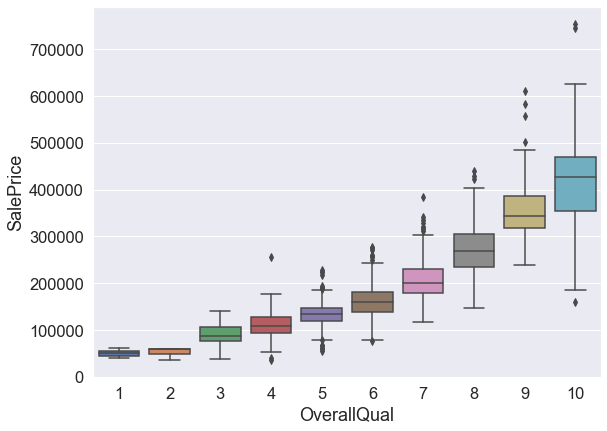

In [21]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

# (Corr= 0.817185) Box plot overallqual/salePrice
fig1 = fig.add_subplot(221); sns.boxplot(x='OverallQual', y='SalePrice', data=train_doc[['SalePrice', 'OverallQual']])


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

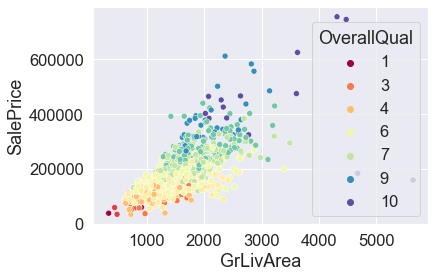

In [22]:
# (Corr= 0.700927) GrLivArea vs SalePrice plot
fig2 = fig.add_subplot(222); 
sns.scatterplot(x = train_doc.GrLivArea, y = train_doc.SalePrice, hue=train_doc.OverallQual, palette= 'Spectral')

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

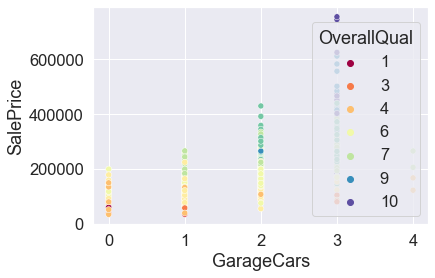

In [23]:
# (Corr= 0.680625) GarageCars vs SalePrice plot
fig3 = fig.add_subplot(223); 
sns.scatterplot(x = train_doc.GarageCars, y = train_doc.SalePrice, hue=train_doc.OverallQual, palette= 'Spectral')


<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

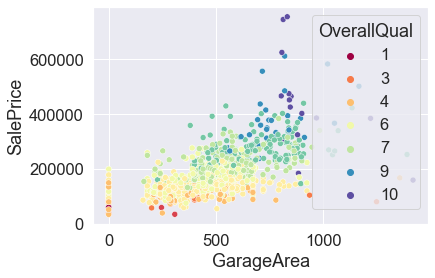

In [24]:

# (Corr= 0.650888) GarageArea vs SalePrice plot
fig4 = fig.add_subplot(224); 
sns.scatterplot(x = train_doc.GarageArea, y = train_doc.SalePrice, hue=train_doc.OverallQual, palette= 'Spectral')

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

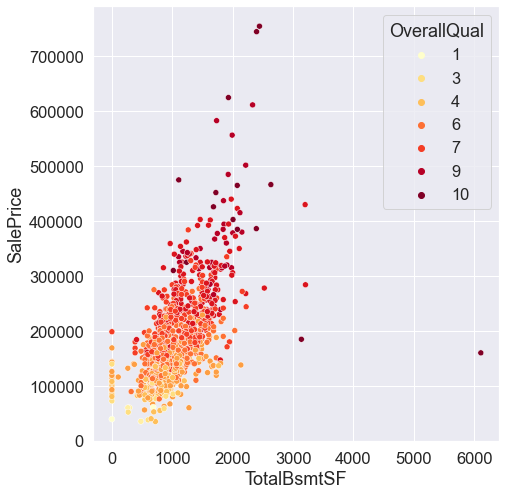

In [25]:
fig5 = plt.figure(figsize=(16, 8))
fig6 = fig5.add_subplot(121); 
sns.scatterplot(y = train_doc.SalePrice , x = train_doc.TotalBsmtSF, hue=train_doc.OverallQual, palette= 'YlOrRd')

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

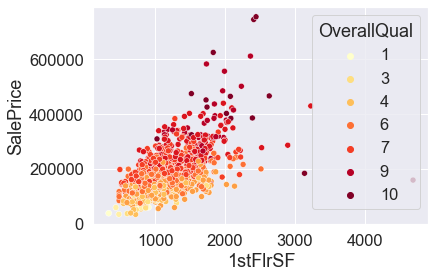

In [26]:
fig7 = fig5.add_subplot(122); 
sns.scatterplot(y = train_doc.SalePrice, x = train_doc['1stFlrSF'], hue=train_doc.OverallQual, palette= 'YlOrRd')


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

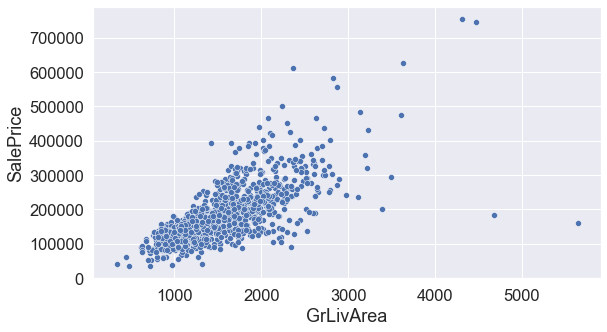

In [27]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
sns.scatterplot(x = train_doc.GrLivArea, y = train_doc.SalePrice, ax = ax)


In [28]:
#Deleting outliers
train_doc = train_doc.drop(train_doc[(train_doc.GrLivArea>4000) & (train_doc.SalePrice<300000)].index)

#Check the graphic again
ax = fig.add_subplot(122)
sns.scatterplot(x =train_doc.GrLivArea, y = train_doc.SalePrice, ax = ax)
plt.show()

In [29]:
ax = fig.add_subplot(122)
sns.scatterplot(x =train_doc.GrLivArea, y = train_doc.SalePrice, ax = ax)


<ipython-input-29-226cbff115c5>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(122)


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


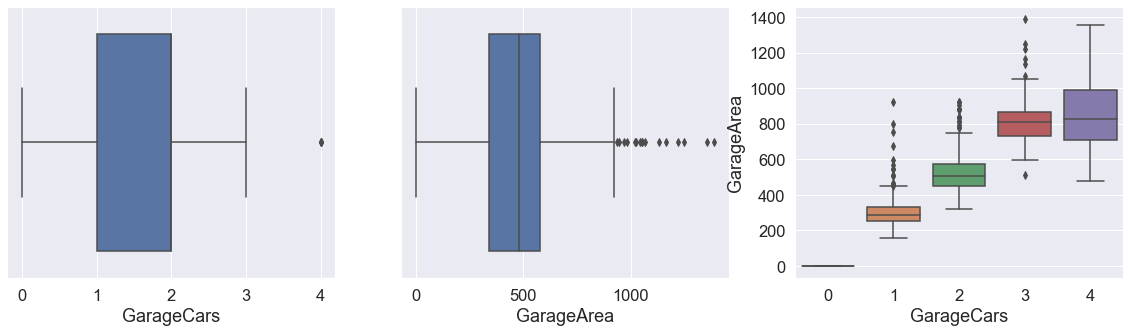

In [30]:
##### Garage areas and parking
fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(131); sns.boxplot(train_doc.GarageCars)
fig2 = fig.add_subplot(132); sns.boxplot(train_doc.GarageArea)
fig3 = fig.add_subplot(133); sns.boxplot(train_doc.GarageCars, train_doc.GarageArea)
plt.show()

In [31]:
## we can note that more than 3 parking cars and more than 900 of area are outliers, since a few number of their observations. 
## Although there is a relationship between them, most likely with a smaller number of parking spaces, 
## there may be more garage area for other purposes, reason why the correlation between them is 0.88 and not 1

<ipython-input-32-cd3476f23568>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GarageAreaByCar'] = train_doc.GarageArea/train_doc.GarageCars
<ipython-input-32-cd3476f23568>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GarageArea_x_Car'] = train_doc.GarageArea*train_doc.GarageCars


                                                                 Outliers: 3


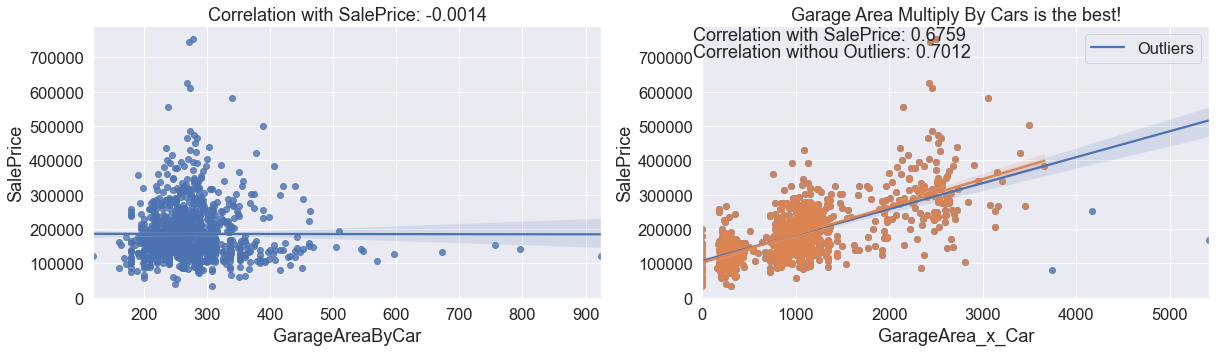

In [32]:
df = train_doc[['SalePrice', 'GarageArea', 'GarageCars']]
df['GarageAreaByCar'] = train_doc.GarageArea/train_doc.GarageCars
df['GarageArea_x_Car'] = train_doc.GarageArea*train_doc.GarageCars

fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(121); sns.regplot(x='GarageAreaByCar', y='SalePrice', data=df)
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.GarageAreaByCar.corr(df['SalePrice'])))

fig2 = fig.add_subplot(122); sns.regplot(x='GarageArea_x_Car', y='SalePrice', data=df); plt.legend(['Outliers'])
plt.text(x=-100, y=750000, s='Correlation with SalePrice: {:6.4f}'.format(df.GarageArea_x_Car.corr(df['SalePrice'])))
print('                                                                 Outliers:',(df.GarageArea_x_Car>=3700).sum())
df = df.loc[df.GarageArea_x_Car<3700]
sns.regplot(x='GarageArea_x_Car', y='SalePrice', data=df); plt.title('Garage Area Multiply By Cars is the best!')
plt.text(x=-100, y=700000, s='Correlation withou Outliers: {:6.4f}'.format(df.GarageArea_x_Car.corr(df['SalePrice'])))
plt.show()
del df

In [33]:
train_doc = train_doc[train_doc.GarageArea * train_doc.GarageCars < 3700]
print('Total observatiosn after outliers cut:', train_doc.shape[0])

Total observatiosn after outliers cut: 1163


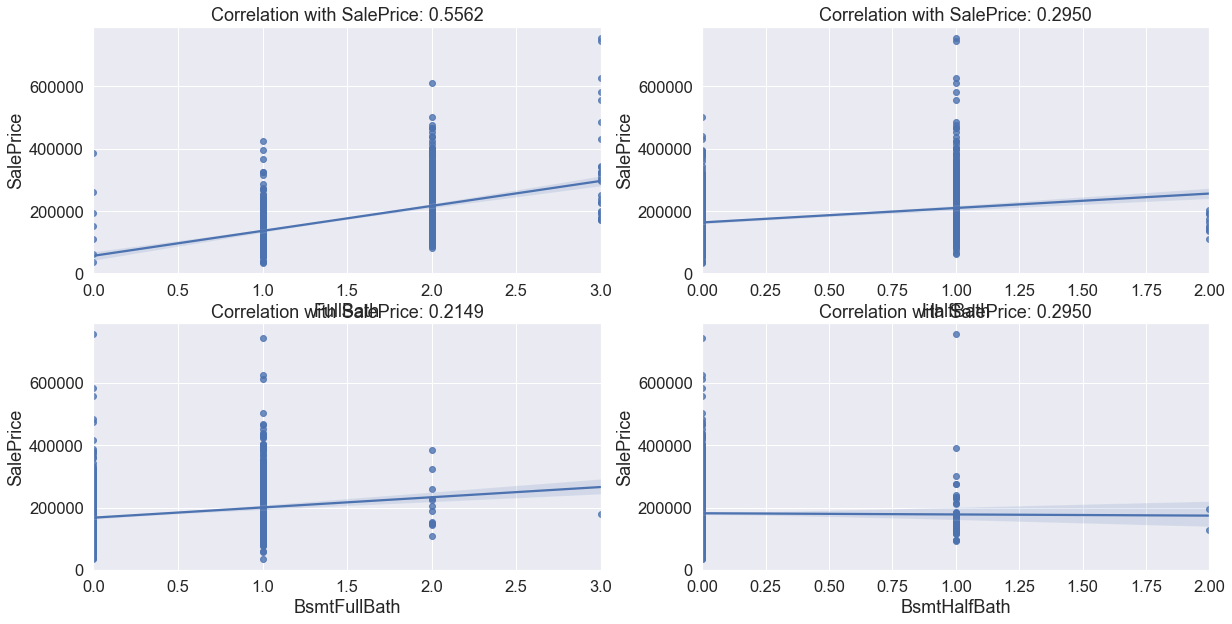

In [34]:
###Bathrooms Features:-

## there are 4 bathroom variables in our data set. FullBath has the largest correlation with SalePrice between than. 
## The others individually, these features are not very important.

fig = plt.figure(figsize=(20,10))
fig1 = fig.add_subplot(221); sns.regplot(x='FullBath', y='SalePrice', data=train_doc)
plt.title('Correlation with SalePrice: {:6.4f}'.format(train_doc.FullBath.corr(train_doc['SalePrice'])))

fig2 = fig.add_subplot(222); sns.regplot(x='HalfBath', y='SalePrice', data=train_doc);
plt.title('Correlation with SalePrice: {:6.4f}'.format(train_doc.HalfBath.corr(train_doc['SalePrice'])))


fig3 = fig.add_subplot(223); sns.regplot(x='BsmtFullBath', y='SalePrice', data=train_doc)
plt.title('Correlation with SalePrice: {:6.4f}'.format(train_doc.BsmtFullBath.corr(train_doc['SalePrice'])))


fig4 = fig.add_subplot(224); sns.regplot(x='BsmtHalfBath', y='SalePrice', data=train_doc);
plt.title('Correlation with SalePrice: {:6.4f}'.format(train_doc.HalfBath.corr(train_doc['SalePrice'])))

plt.show()

<ipython-input-35-eeac41645108>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotBathrooms'] = df.FullBath + (df.HalfBath*0.5) + df.BsmtFullBath + (df.BsmtHalfBath*0.5)


                                                                 Outliers: 2


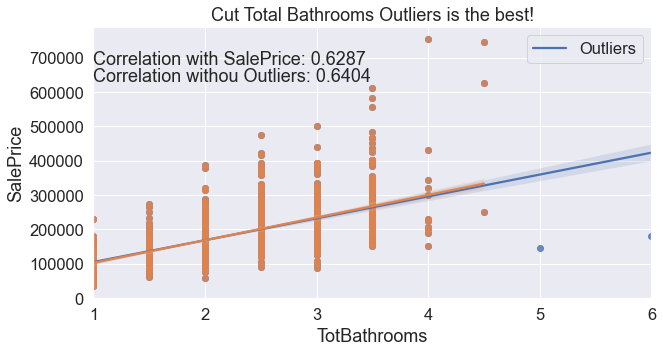

In [35]:
#I assume that I if I add them up into one predictor, this predictor is likely to become a strong one. 
#A half-bath, also known as a powder room or guest bath, has only two of the four main bathroom components-typically 
#a toilet and sink. Consequently, I will also count the half bathrooms as half.

df = train_doc[['SalePrice', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']]
df['TotBathrooms'] = df.FullBath + (df.HalfBath*0.5) + df.BsmtFullBath + (df.BsmtHalfBath*0.5)

fig = plt.figure(figsize=(10,5))
sns.regplot(x='TotBathrooms', y='SalePrice', data=df); plt.legend(['Outliers'])
plt.text(x=1, y=680000, s='Correlation with SalePrice: {:6.4f}'.format(df.TotBathrooms.corr(df['SalePrice'])))
print('                                                                 Outliers:',(df.TotBathrooms>=5).sum())
df = df.loc[df.TotBathrooms<5]
sns.regplot(x='TotBathrooms', y='SalePrice', data=df); plt.title('Cut Total Bathrooms Outliers is the best!')
plt.text(x=1, y=630000, s='Correlation withou Outliers: {:6.4f}'.format(df.TotBathrooms.corr(df['SalePrice'])))
plt.show()



In [36]:
train_doc = train_doc[(train_doc.FullBath + (train_doc.HalfBath*0.5) + train_doc.BsmtFullBath + (train_doc.BsmtHalfBath*0.5))<5]
print('Data observations after outliers deletion:', train_doc.shape[0])

Data observations after outliers deletion: 1161


## Check the Dependent Variable - SalePrice:


In [37]:
## Since most of the machine learning algorithms start from the principle that our data has a normal distribution,
## we first take a look at the distribution of our dependent variable. For this, I create a procedure to plot the 
# Sales Distribution and QQ-plot to identify substantive departures from normality, likes outliers, skewness and kurtosis.

In [38]:

def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


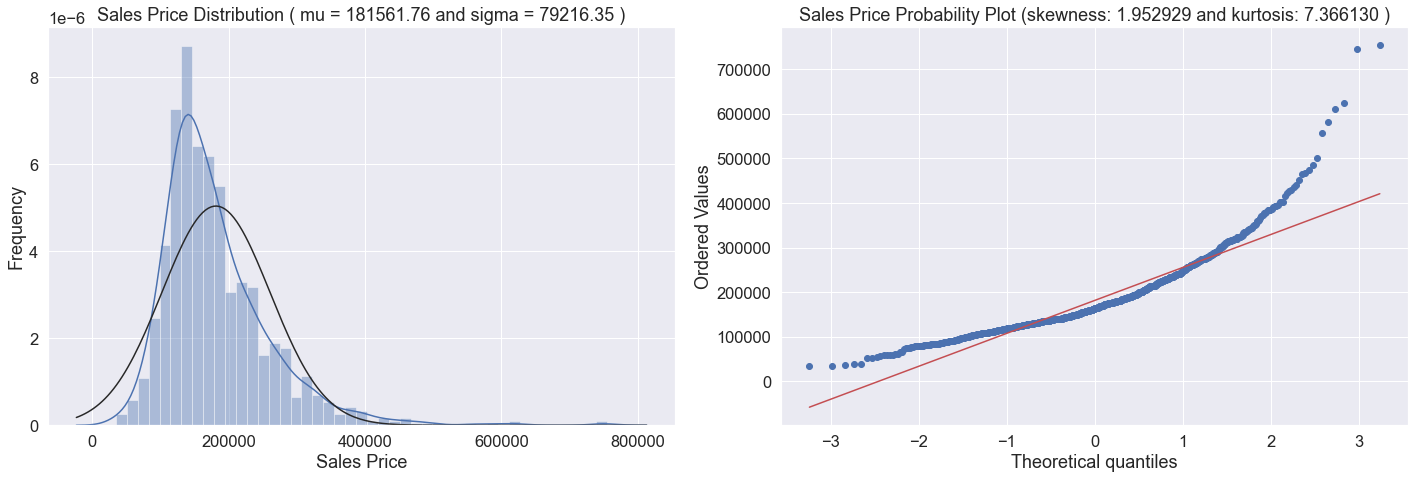

In [39]:
QQ_plot(train_doc.SalePrice, 'Sales Price')

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


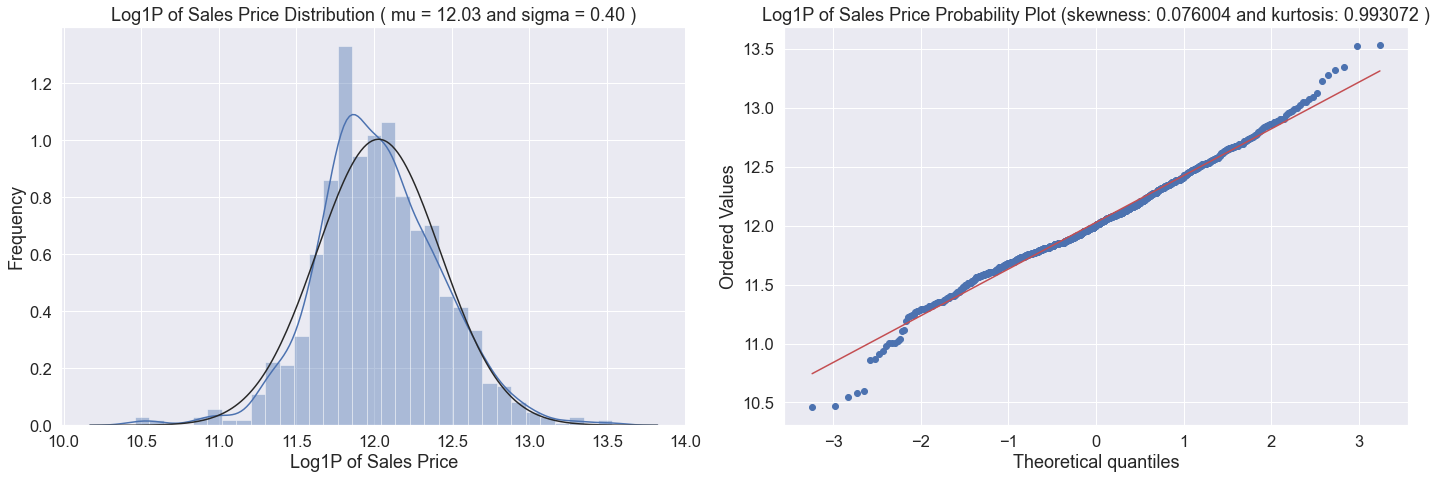

In [40]:
#We use the numpy fuction log1p which applies log(1+x) to all elements of the column
train_doc.SalePrice = np.log1p(train_doc.SalePrice)

QQ_plot(train_doc.SalePrice, 'Log1P of Sales Price')

<ipython-input-41-ff3b77d1d5df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ConstructArea'] = (train_doc.TotalBsmtSF.fillna(0) + train_doc.WoodDeckSF.fillna(0) + train_doc.GrLivArea.fillna(0) +
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other argu

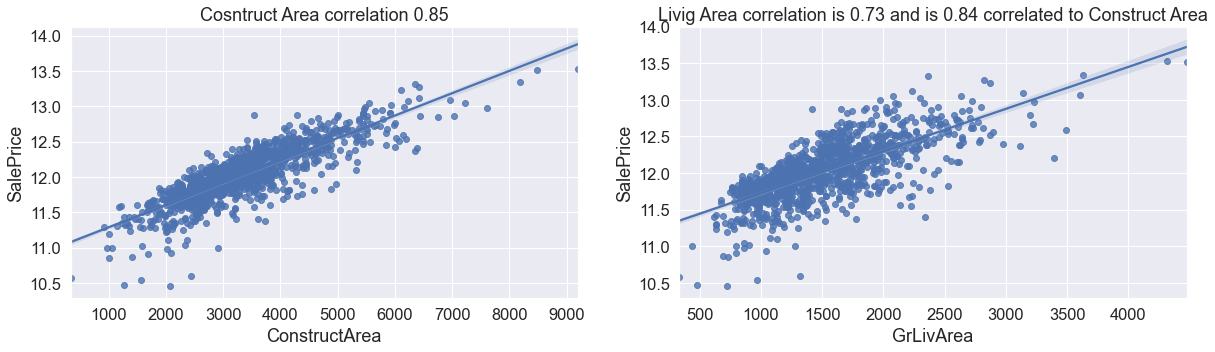

In [41]:
df = train_doc[['SalePrice', 'GrLivArea']]
df['ConstructArea'] = (train_doc.TotalBsmtSF.fillna(0) + train_doc.WoodDeckSF.fillna(0) + train_doc.GrLivArea.fillna(0) + 
                       train_doc.MasVnrArea.fillna(0) + train_doc.GarageArea.fillna(0) + train_doc.OpenPorchSF.fillna(0) + 
                       train_doc.TSsnPorch.fillna(0) + train_doc.ScreenPorch.fillna(0) + train_doc.EnclosedPorch.fillna(0) + 
                       train_doc.PoolArea.fillna(0) )
                         
fig8 = plt.figure(figsize=(20,5))
fig9 = fig8.add_subplot(121); sns.regplot((df.ConstructArea), df.SalePrice)
plt.title('Cosntruct Area correlation {:1.2f}'.format(df.ConstructArea.corr(df.SalePrice)))

fig10 = fig8.add_subplot(122); sns.regplot((df.GrLivArea.fillna(0)), df.SalePrice)
tit = 'Livig Area correlation is {:1.2f} and is {:1.2f} correlated to Construct Area'
plt.title(tit.format(df.GrLivArea.fillna(0).corr(df.SalePrice), df.GrLivArea.corr(df.ConstructArea)))
plt.show()

In [42]:
def print_results():
    # The coefficients
    print('Coefficients: \n', lr.coef_)
    # The mean squared error
    print("Root mean squared error: %.4f"
          % np.expm1(np.sqrt(mean_squared_error(y_test, y_pred))))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.4f' % r2_score(y_test, y_pred))
    print('--------------------------------------------------------------------------------\n')
    
scale = RobustScaler()
y = df.SalePrice

X = scale.fit_transform(df[['ConstructArea', 'GrLivArea']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

lr = LinearRegression()

print('1. Linear regressor with only living Area:')
lr.fit(X_train[: , 1].reshape(-1, 1), y_train)

# Make predictions using the testing set
y_pred = lr.predict(X_test[: , 1].reshape(-1, 1))
print_results()

print('2. Linear regressor with bouth features:')
lr.fit(X_train, y_train)

# Makepredictions using the testing set
y_pred = lr.predict(X_test)
print_results()

print('3. Linear regressor with only Construct Area:')
lr = LinearRegression()
lr.fit(X_train[: , 0].reshape(-1, 1), y_train)

# Makepredictions using the testing set
y_pred = lr.predict(X_test[: , 0].reshape(-1, 1))
print_results()

print('4. Polinomial regressor of orden 3 with only Construction Area:')
# create polynomial features
cubic = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
X_cubic = cubic.fit_transform(X_train[: , 0].reshape(-1, 1))

# cubic fit
lr = lr.fit(X_cubic, y_train)
y_pred = lr.predict(cubic.fit_transform(X_test[: , 0].reshape(-1, 1)))
print_results()

print('5. Polinomial regressor of orden 3 with both features:')
# create polynomial features
cubic = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
X_cubic = cubic.fit_transform(X_train)

# cubic fit
lr = lr.fit(X_cubic, y_train)
y_pred = lr.predict(cubic.fit_transform(X_test))
print_results()


1. Linear regressor with only living Area:
Coefficients: 
 [0.36292452]
Root mean squared error: 0.3046
Variance score: 0.5853
--------------------------------------------------------------------------------

2. Linear regressor with bouth features:
Coefficients: 
 [0.4042374  0.01203505]
Root mean squared error: 0.2407
Variance score: 0.7270
--------------------------------------------------------------------------------

3. Linear regressor with only Construct Area:
Coefficients: 
 [0.41364287]
Root mean squared error: 0.2413
Variance score: 0.7259
--------------------------------------------------------------------------------

4. Polinomial regressor of orden 3 with only Construction Area:
Coefficients: 
 [ 0.44409166 -0.04610041  0.00274208]
Root mean squared error: 0.2391
Variance score: 0.7303
--------------------------------------------------------------------------------

5. Polinomial regressor of orden 3 with both features:
Coefficients: 
 [ 0.43508946  0.01871044 -0.0417731

we can safely eliminate the living area, and as there are no records with it zero or null we will not create an existence indicator for it.
We may be able to discard other area metrics, especially those that have many zeros for nulls, which contribute little to accuracy and even to reduce multicollinearity.
the polynomial transformation of 3th degree presents improvements of 2.6% and 1.8% of RMSE and R2 respectively. So, now we have a simple regressor from our specialist to bit!